In [1]:
import sys
sys.path

['d:\\Desktop\\QBM_project_repo\\quMCMC\\final_results_notebooks',
 'd:\\anaconda_neel\\python38.zip',
 'd:\\anaconda_neel\\DLLs',
 'd:\\anaconda_neel\\lib',
 'd:\\anaconda_neel',
 '',
 'd:\\anaconda_neel\\lib\\site-packages',
 'd:\\anaconda_neel\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'd:\\anaconda_neel\\lib\\site-packages\\win32',
 'd:\\anaconda_neel\\lib\\site-packages\\win32\\lib',
 'd:\\anaconda_neel\\lib\\site-packages\\Pythonwin',
 'd:\\anaconda_neel\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\NEELKANTH RAWAT\\.ipython']

In [3]:
sys.path.append("d:/Desktop/QBM_project_repo/quMCMC") 

In [4]:
import qumcmc

In [5]:
## import essential modules 
from qumcmc.basic_utils import *
from qumcmc.energy_models import IsingEnergyFunction, Exact_Sampling

from qumcmc.classical_mcmc_routines import classical_mcmc
from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc     #for Qulacs Simulator backend (** Faster )
from qumcmc.quantum_mcmc_qulacs_2 import quantum_enhanced_mcmc_2
# from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 

from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics
from qumcmc.prob_dist import DiscreteProbabilityDistribution

import pickle

### Load BAS dataset

In [6]:
gridsize=3

bas= bas_dataset(grid_size=gridsize)
bas.dataset.sort()

     MODEL : ising model 9X9 bars |  beta : 1.5
Num Most Probable States : 6
Entropy : 2.5849625007211547
---------------------------------------------


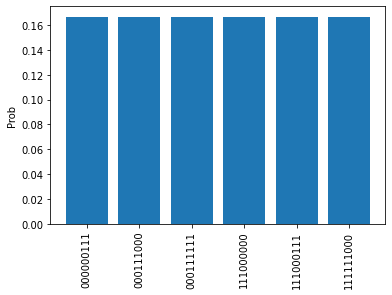

In [7]:
# consider only the bars dataset and create the weight matrix for them and create the ising model
wt= hebbing_learning(bas.bas_dict["bars"])## added 2 datapoints from stripes dataset into it
n_spins=gridsize*gridsize
shape_of_J=(n_spins,n_spins)
J=-1*wt
h=np.zeros(n_spins)
model=IsingEnergyFunction(J,h,name=f'ising model {n_spins}X{n_spins} bars')

# model.model_summary()
beta=1.5
## run exact sampling over all possible configurations 
exact_sampled_model = Exact_Sampling(model, beta)

## get distribution from the model
bpd_2= DiscreteProbabilityDistribution(exact_sampled_model.boltzmann_pd)
exact_sampled_model.sampling_summary()

### Now run 10 differet chains for each case and save the data

In [8]:
num_chains=10
steps =30000 # let's run small number of runs
gamma_range=(0.4,0.6)

initial_state="111000111"

In [9]:
### case: random 1
bas_final_wt1=[]

for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_1=quantum_enhanced_mcmc_2(n_hops=steps,
                                            model=model,
                                            initial_state= initial_state,
                                            mixer= [[['random', 1]], []]# add something here,
                                            ,gamma_range=gamma_range ,verbose=True)
    bas_final_wt1.append(mcmc_1)

### save the list
with open('Bars_final_plots_Wt1.pkl', 'wb') as f:
    pickle.dump(bas_final_wt1, f)

runnning quantum MCMC steps . ..:   0%|          | 9/30000 [00:00<06:17, 79.44it/s]

chain number: 0
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 23/30000 [00:00<04:22, 114.11it/s]

chain number: 1
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 8/30000 [00:00<06:46, 73.69it/s]

chain number: 2
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 11/30000 [00:00<04:37, 108.11it/s]

chain number: 3
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 10/30000 [00:00<05:18, 94.25it/s]

chain number: 4
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 9/30000 [00:00<05:36, 89.21it/s]

chain number: 5
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 23/30000 [00:00<04:33, 109.69it/s]

chain number: 6
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 8/30000 [00:00<06:29, 77.02it/s]

chain number: 7
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 12/30000 [00:00<04:27, 112.11it/s]

chain number: 8
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 14/30000 [00:00<03:40, 135.92it/s]

chain number: 9
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..: 100%|██████████| 30000/30000 [05:06<00:00, 97.76it/s] 


In [10]:
### highly symmetric mixer
bas_symmetric=[]

for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_3= quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=[[['custom', [[0, 1, 2], [3, 4, 5], [6, 7, 8]]]], 
                                            []],
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_symmetric.append(mcmc_3)

### save the list
with open('Bars_final_plots_symmetrix.pkl', 'wb') as f:
    pickle.dump(bas_symmetric, f)


runnning quantum MCMC steps . ..:   0%|          | 10/30000 [00:00<05:10, 96.58it/s]

chain number: 0
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 8/30000 [00:00<06:47, 73.63it/s]

chain number: 1
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 9/30000 [00:00<05:58, 83.76it/s]

chain number: 2
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 2/30000 [00:00<25:06, 19.91it/s]

chain number: 3
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 10/30000 [00:00<05:41, 87.90it/s]

chain number: 4
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 15/30000 [00:00<03:41, 135.56it/s]

chain number: 5
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 12/30000 [00:00<04:28, 111.83it/s]

chain number: 6
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 9/30000 [00:00<06:27, 77.30it/s]

chain number: 7
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 10/30000 [00:00<05:01, 99.58it/s]

chain number: 8
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 12/30000 [00:00<04:51, 102.87it/s]

chain number: 9
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..: 100%|██████████| 30000/30000 [05:08<00:00, 97.09it/s] 


In [11]:
### case wt3
bas_wt3=[]

for i in range(0,num_chains):
    print(f"chain number: {i}")
    mcmc_2= quantum_enhanced_mcmc_2(n_hops=steps,
                                    model=model,
                                    initial_state=initial_state,
                                    mixer=[[['random', 3]], []],
                                    gamma_range=gamma_range,
                                    verbose=True)
    bas_wt3.append(mcmc_2)

### save the list
with open('Bars_final_plots_Wt3.pkl', 'wb') as f:
    pickle.dump(bas_wt3, f)

runnning quantum MCMC steps . ..:   0%|          | 4/30000 [00:00<14:58, 33.37it/s]

chain number: 0
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 4/30000 [00:00<18:11, 27.48it/s]

chain number: 1
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 7/30000 [00:00<09:29, 52.66it/s]

chain number: 2
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 5/30000 [00:00<13:04, 38.24it/s]

chain number: 3
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 10/30000 [00:00<15:05, 33.11it/s]

chain number: 4
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 4/30000 [00:00<14:41, 34.04it/s]

chain number: 5
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 5/30000 [00:00<11:35, 43.11it/s]

chain number: 6
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 4/30000 [00:00<14:19, 34.90it/s]

chain number: 7
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 5/30000 [00:00<12:54, 38.75it/s]

chain number: 8
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..:   0%|          | 6/30000 [00:00<09:43, 51.38it/s]

chain number: 9
starting with:  111000111 with energy: -72.0


runnning quantum MCMC steps . ..: 100%|██████████| 30000/30000 [13:34<00:00, 36.83it/s] 
